# Cohort Analysis for assessing customer retention in E-commerce industry

In [2]:
import numpy as np #Calculation
import pandas as pd # Excel for python
import seaborn as sns # charting package

import matplotlib.pyplot as plt # Original charting package in Python


%matplotlib inline 

import datetime as dt # All for date and time series manipulation

#set all rows to diplay
pd.options.display.max_rows = None

#Stops a false alern chaining error
pd.options.mode.chained_assignment = None

In [3]:
data = pd.read_csv('Dataset_ecommerce.csv')

In [4]:
data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


# Describe stat for numerical data only

In [6]:
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


# Describe stat for numerical and non-data

In [8]:
data.describe(include = 'all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


# Check for missing values

In [10]:
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

# Drop missing values

In [12]:
data.dropna(inplace = True)
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

# Check for info in the DataFrame

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


# Convert the InvoiceDate to datetime formate

In [16]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


# Exploratory Data Analysis, EDA

### Analysis by country

In [20]:
quantity_by_country = data.groupby(['Country'])['Quantity'].sum()
quantity_by_country

Country
Algeria          736181
Benin            738133
Burkina Faso     728332
Cameroon         730881
Cote d'Ivoire    740229
Egypt            729299
Ethiopia         732940
Ghana            735354
Kenya            732247
Libya            739206
Madagascar       726297
Mali             732358
Morocco          732594
Mozambique       735416
Niger            725841
Nigeria          739708
Rwanda           733511
Senegal          733968
Sierra Leone     735477
Somalia          736219
South Africa     740589
Sudan            734158
Tanzania         725664
Togo             741223
Tunisia          733082
Uganda           724525
Zambia           725152
Zimbabwe         737522
Name: Quantity, dtype: int64

In [21]:
# Put it in DataFrame
quantity_by_country = data.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country

,Country,Quantity
0,Algeria,736181
1,Benin,738133
2,Burkina Faso,728332
3,Cameroon,730881
4,Cote d'Ivoire,740229
5,Egypt,729299
6,Ethiopia,732940
7,Ghana,735354
8,Kenya,732247
9,Libya,739206


In [22]:
# Put the DataFrame in Descending
quantity_by_country = data.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values('Quantity', ascending = False).reset_index()

In [23]:
quantity_by_country.head(10)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206
5,1,Benin,738133
6,27,Zimbabwe,737522
7,19,Somalia,736219
8,0,Algeria,736181
9,18,Sierra Leone,735477


# Top 10 countries where most of the products are sold

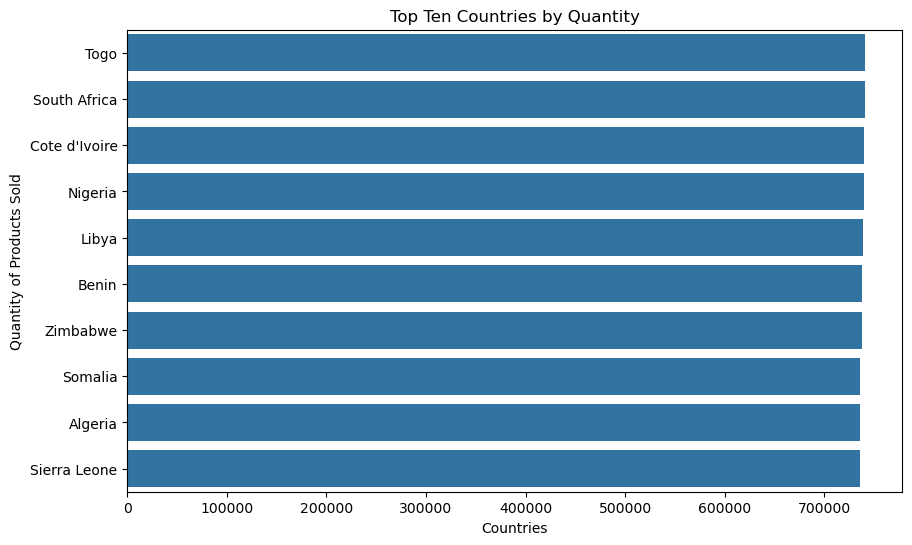

In [25]:
top_10_country = quantity_by_country.head(10)

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Quantity' , y = 'Country', data = top_10_country)
 
plt.xlabel('Countries')
plt.ylabel('Quantity of Products Sold')
plt.title('Top Ten Countries by Quantity')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_3328\2319307983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Quantity', y='Country', data=top_10_country, palette="viridis")


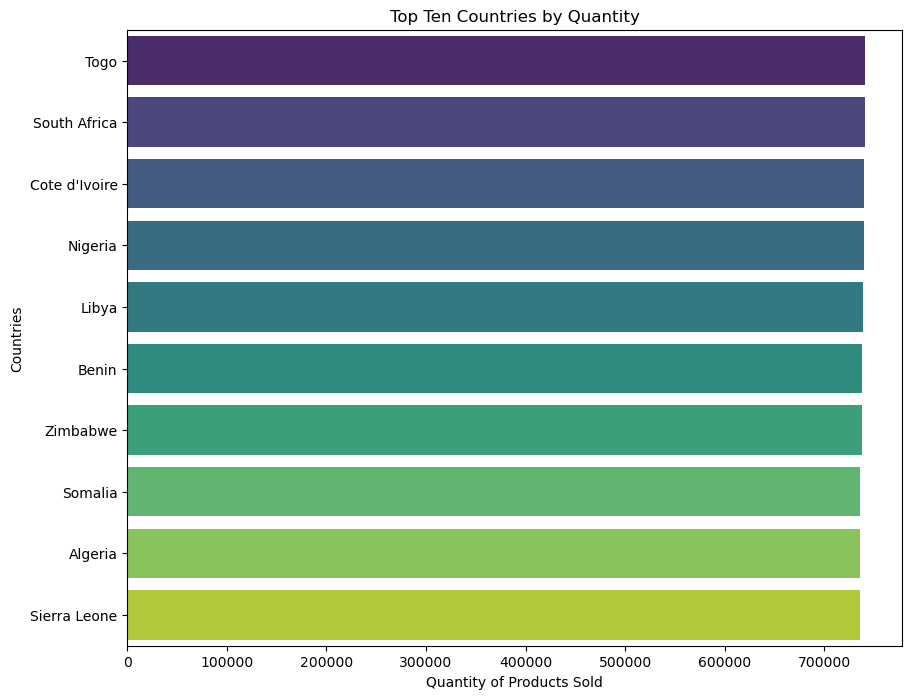

In [26]:
top_10_country = quantity_by_country.head(10)

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
ax = sns.barplot(x='Quantity', y='Country', data=top_10_country, palette="viridis")

plt.xlabel('Quantity of Products Sold')
plt.ylabel('Countries')
plt.title('Top Ten Countries by Quantity')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_3328\219154150.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Quantity', y='Country', data=top_10_country, palette="viridis")


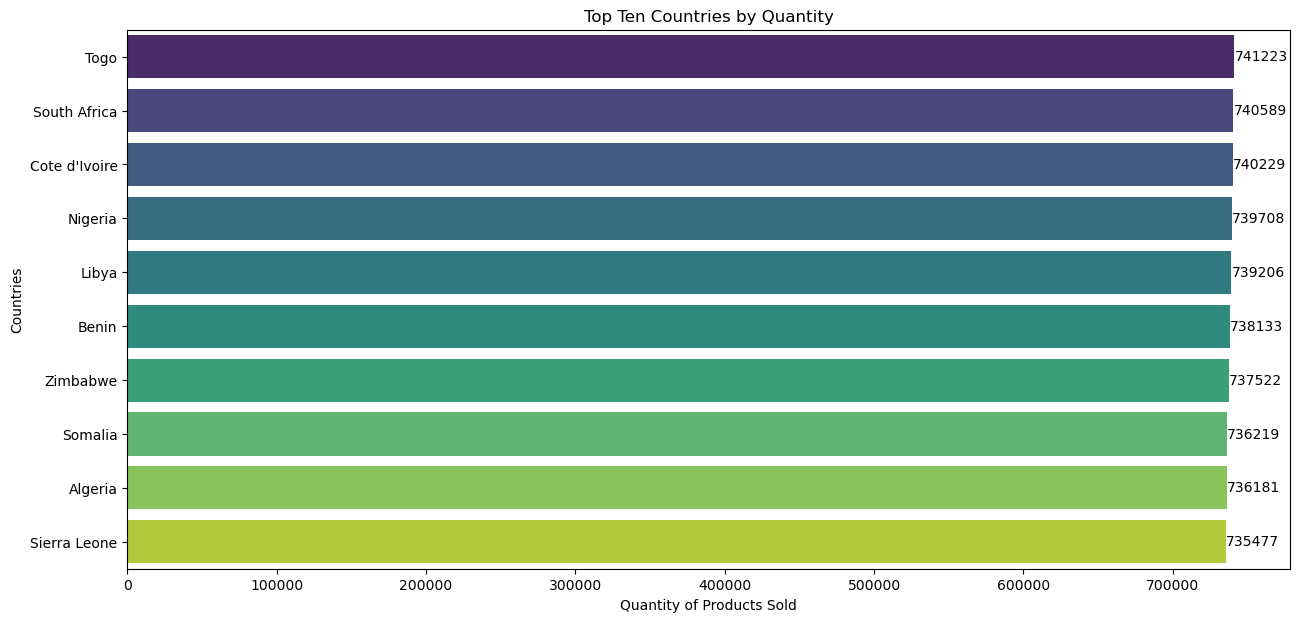

In [27]:
# Select the top 10 countries

top_10_country = quantity_by_country.head(10)

# Plotting the bar chart
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='Quantity', y='Country', data=top_10_country, palette="viridis")

# Adding data values (annotations) to the bars
for index, value in enumerate(top_10_country['Quantity']):
    plt.text(value, index, f'{value:.0f}', color='black', ha="left", va="center")

# Setting the labels and title
plt.xlabel('Quantity of Products Sold')
plt.ylabel('Countries')
plt.title('Top Ten Countries by Quantity')
plt.show()


# Least 10 countries where less of the products are sold

In [29]:
quantity_by_country.tail(10)

,index,Country,Quantity
18,11,Mali,732358
19,8,Kenya,732247
20,3,Cameroon,730881
21,5,Egypt,729299
22,2,Burkina Faso,728332
23,10,Madagascar,726297
24,14,Niger,725841
25,22,Tanzania,725664
26,26,Zambia,725152
27,25,Uganda,724525


C:\Users\USER\AppData\Local\Temp\ipykernel_3328\736835522.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Quantity', y='Country', data=least_10_country, palette="viridis")


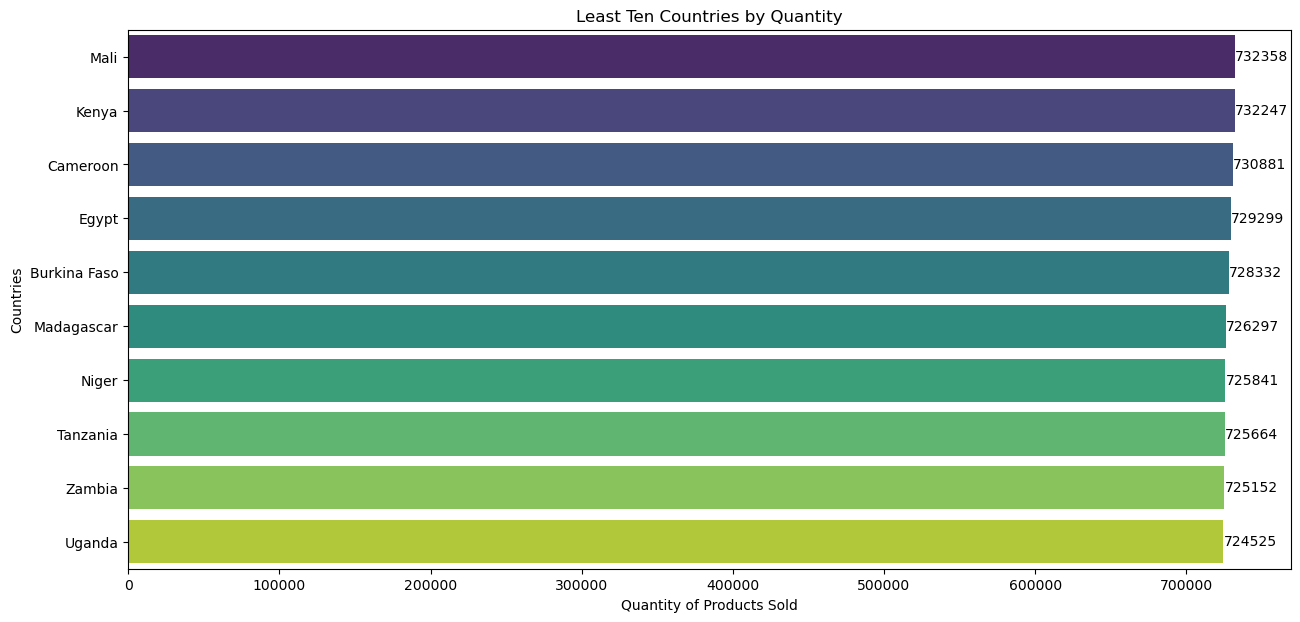

In [30]:
# Select the least 10 countries
least_10_country = quantity_by_country.tail(10)

# Plotting the bar chart
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='Quantity', y='Country', data=least_10_country, palette="viridis")

# Adding data values (annotations) to the bars
for index, value in enumerate(least_10_country['Quantity']):
    plt.text(value, index, f'{value:.0f}', color='black', ha="left", va="center")

# Setting the labels and title
plt.xlabel('Quantity of Products Sold')
plt.ylabel('Countries')
plt.title('Least Ten Countries by Quantity')
plt.show()


# Analysis of Country by number of Customers

In [32]:
# Calculate the number of unique customers per country
country_to_customer = data.groupby(['Country'])['CustomerID'].nunique()

# Sort the values in descending order and reset the index
country_to_customer = country_to_customer.sort_values(ascending=False).reset_index()
country_to_customer.head(10)

,Country,CustomerID
0,Mozambique,3072
1,Benin,3054
2,Togo,3053
3,Nigeria,3051
4,Burkina Faso,3049
5,Sierra Leone,3046
6,Mali,3044
7,Algeria,3043
8,Senegal,3040
9,Niger,3039


# Visualise the Top 10 Countries with the Highest Number of Customers

C:\Users\USER\AppData\Local\Temp\ipykernel_3328\1204141279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='CustomerID', y='Country', data= top_countries_with_most_customers, palette="viridis")


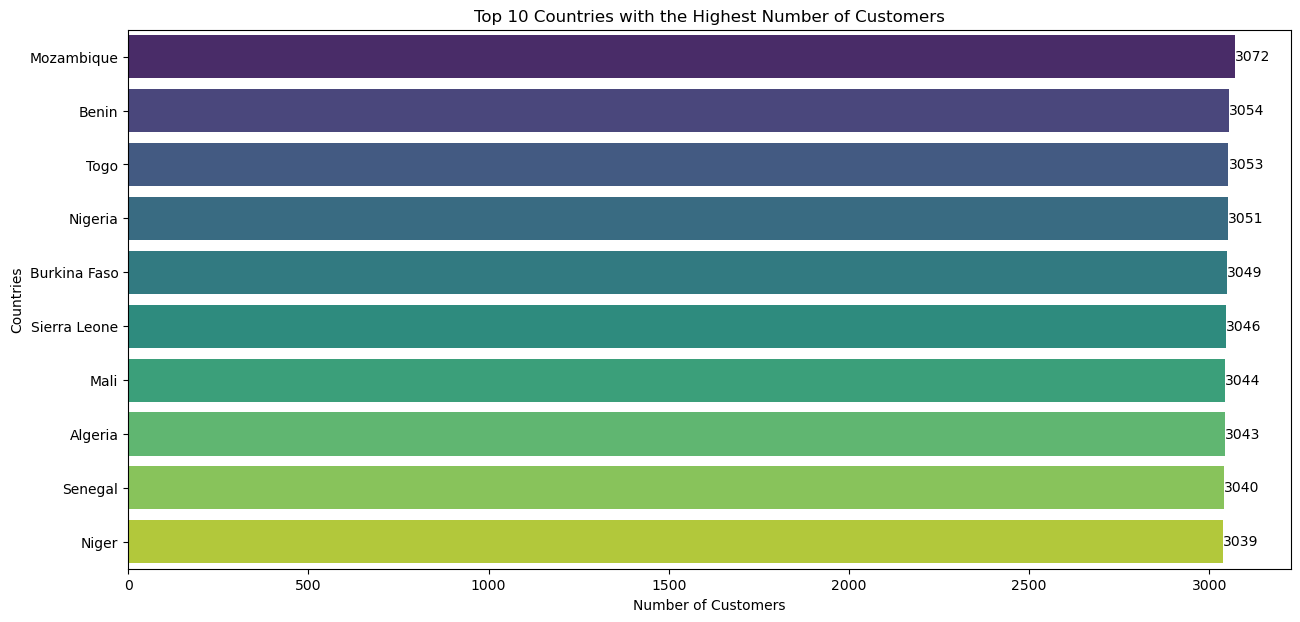

In [34]:
top_countries_with_most_customers = country_to_customer.head(10)

# Plotting the bar chart
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='CustomerID', y='Country', data= top_countries_with_most_customers, palette="viridis")

# Adding data values (annotations) to the bars
for index, value in enumerate(top_countries_with_most_customers['CustomerID']):
    plt.text(value, index, f'{value:.0f}', color='black', ha="left", va="center")

# Setting the labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Countries')
plt.title('Top 10 Countries with the Highest Number of Customers')
plt.show()


# Least 10 Countries with the Loowest Number of Customers

In [36]:
country_to_customer.tail(10)

,Country,CustomerID
18,Egypt,3029
19,Cameroon,3029
20,Tunisia,3028
21,Cote d'Ivoire,3026
22,South Africa,3026
23,Rwanda,3018
24,Kenya,3009
25,Somalia,3008
26,Morocco,2993
27,Uganda,2981


C:\Users\USER\AppData\Local\Temp\ipykernel_3328\962815221.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='CustomerID', y='Country', data= least_countries_with_least_customers, palette="viridis")


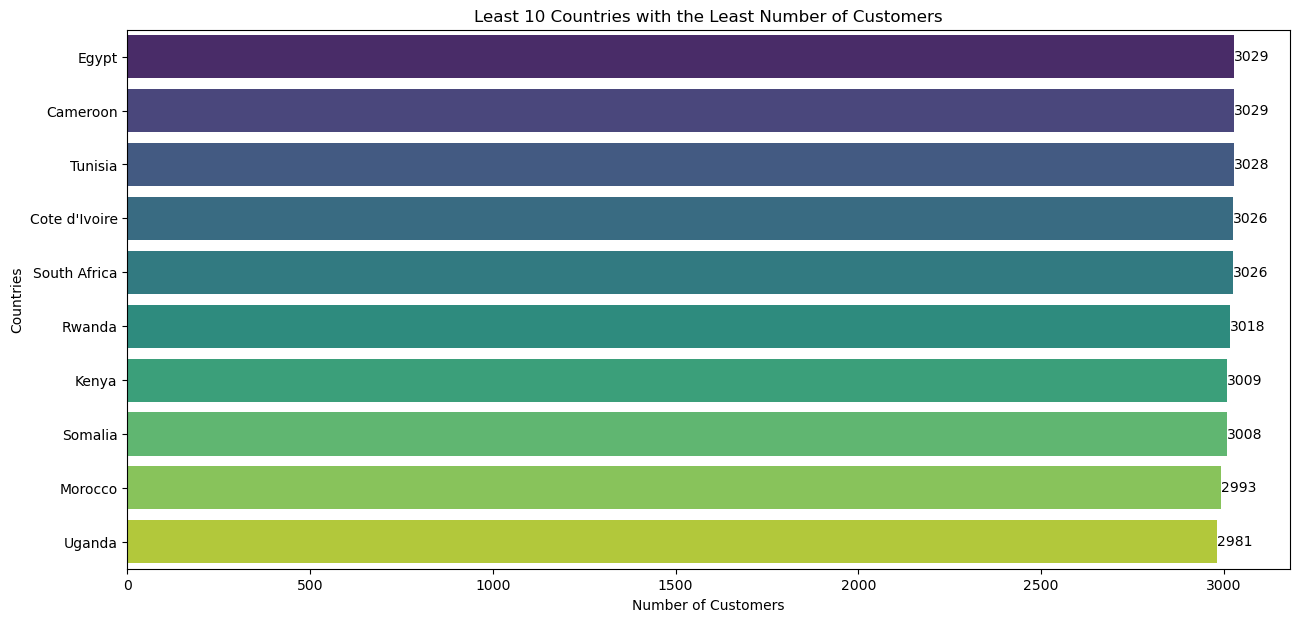

In [37]:
least_countries_with_least_customers = country_to_customer.tail(10)

# Plotting the bar chart
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='CustomerID', y='Country', data= least_countries_with_least_customers, palette="viridis")

# Adding data values (annotations) to the bars
for index, value in enumerate(least_countries_with_least_customers['CustomerID']):
    plt.text(value, index, f'{value:.0f}', color='black', ha="left", va="center")

# Setting the labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Countries')
plt.title('Least 10 Countries with the Least Number of Customers')
plt.show()

# Sales Trend Visualisation 

In [39]:
monthly_sale = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

In [40]:
monthly_sale

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

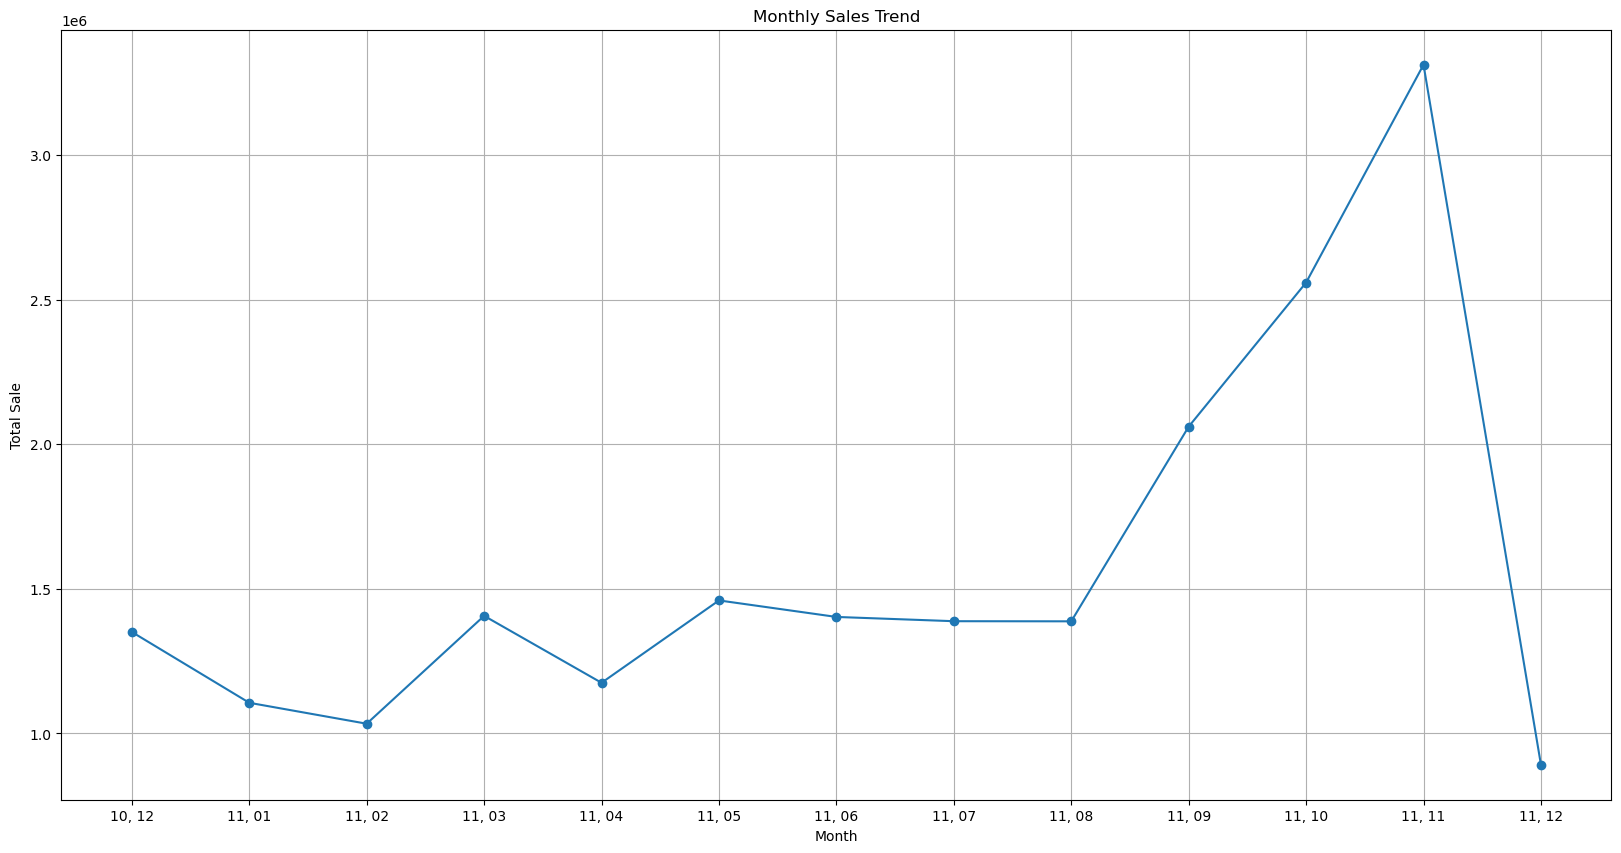

In [41]:
# Create a line plot
plt.figure(figsize = (20, 10))
plt.plot(monthly_sale.index.strftime('%y, %m'), monthly_sale.values, marker = 'o', linestyle = '-')
plt.xlabel('Month')
plt.ylabel('Total Sale')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()

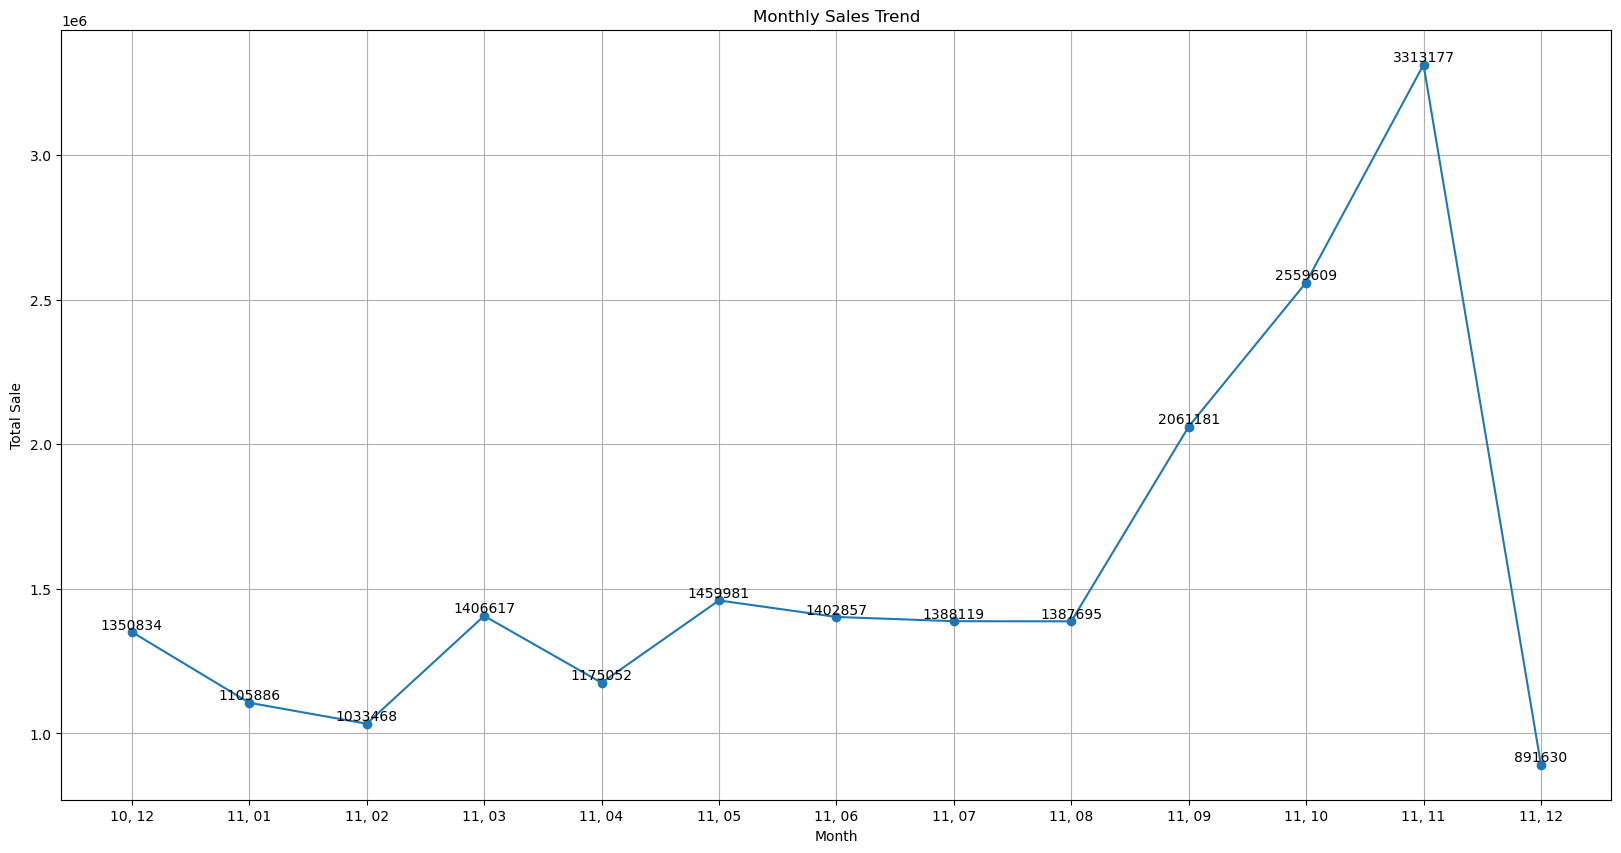

In [42]:
import matplotlib.pyplot as plt

# Assuming 'monthly_sale' is a Pandas Series with datetime index and sale values

# Create a line plot
plt.figure(figsize=(20, 10))
plt.plot(monthly_sale.index.strftime('%y, %m'), monthly_sale.values, marker='o', linestyle='-')

# Adding data values (annotations) to each point
for i, value in enumerate(monthly_sale.values):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')

# Setting the labels and title
plt.xlabel('Month')
plt.ylabel('Total Sale')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()


# Key_findings:
1. Sales Spike: Notable increase from September to November 2011, likely due to seasonal factors or successful promotions.
2. December Dip: Sharp decline in sales post-peak—highlighting the need for effective post-holiday strategies.


# Cohort Analysis

In [133]:
# create an invoice month
import datetime as dt

# function for month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

#Apply the function
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Cohort Month,Cohortindex
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-12-01,2011-08-01,5
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-12-01,2011-08-01,5
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-12-01,2011-08-01,5
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-12-01,2011-08-01,5
541908,581587,2011-12-09 12:50:00,12680.0,SC9276,Toys,6,46.62,Ethiopia,2011-12-01,2011-08-01,5


### Create a column index with the minimum invoice date aka first time customer was acquired

In [135]:
data['Cohort Month'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')
data.head(3)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Cohort Month,Cohortindex
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,2010-12-01,1
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,2010-12-01,1
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,2010-12-01,1


### Create a date element function to get a series for substraction

In [137]:
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [138]:
## Get the date element for our corhot and invoce columns

_, Invoice_month, Invovice_year = get_date_elements(data, 'InvoiceMonth')
_, Cohort_month, Cohort_year = get_date_elements(data, 'Cohort Month')

In [139]:
# check the series 
Invoice_month[:3]


0    12
1    12
2    12
Name: InvoiceMonth, dtype: int32

In [140]:
# check the series 
Cohort_month[:3]

0    12
1    12
2    12
Name: Cohort Month, dtype: int32

In [141]:
# check the series 
Cohort_year[:3]

0    2010
1    2010
2    2010
Name: Cohort Month, dtype: int32

In [143]:
Invovice_year[:3]

0    2010
1    2010
2    2010
Name: InvoiceMonth, dtype: int32

# Create a cohort index

In [146]:
# Create a cohort index
year_diff = Invovice_year - Cohort_year
month_diff = Invoice_month - Cohort_month

data['Cohortindex'] = year_diff*12+month_diff+1
data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Cohort Month,Cohortindex
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,2010-12-01,1
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,2010-12-01,1
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,2010-12-01,1
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,2010-12-01,1
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,2010-12-01,1


In [154]:
data.tail(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Cohort Month,Cohortindex
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-12-01,2011-08-01,5
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-12-01,2011-08-01,5
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-12-01,2011-08-01,5
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-12-01,2011-08-01,5
541908,581587,2011-12-09 12:50:00,12680.0,SC9276,Toys,6,46.62,Ethiopia,2011-12-01,2011-08-01,5


In [155]:

# Count the Customer ID by Brouping  by Corhot Month and Corhot Index
cohort_data = data.groupby(['Cohort Month', 'Cohortindex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,Cohortindex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
5,2010-12-01,6,376
6,2010-12-01,7,360
7,2010-12-01,8,336
8,2010-12-01,9,336
9,2010-12-01,10,374


# Create a pivot table 

In [175]:
#Create a pivot table
cohort_table = cohort_data.pivot(index = 'Cohort Month', columns = ['Cohortindex'], values =  'CustomerID')
# Change index
cohort_table.index = cohort_table.index.strftime('%B, %Y')
cohort_table

Cohortindex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
"December, 2010",948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
"January, 2011",421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
"February, 2011",380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
"March, 2011",440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
"April, 2011",299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
"May, 2011",279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
"June, 2011",235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
"July, 2011",191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"August, 2011",167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# visualise our result in heatmap 

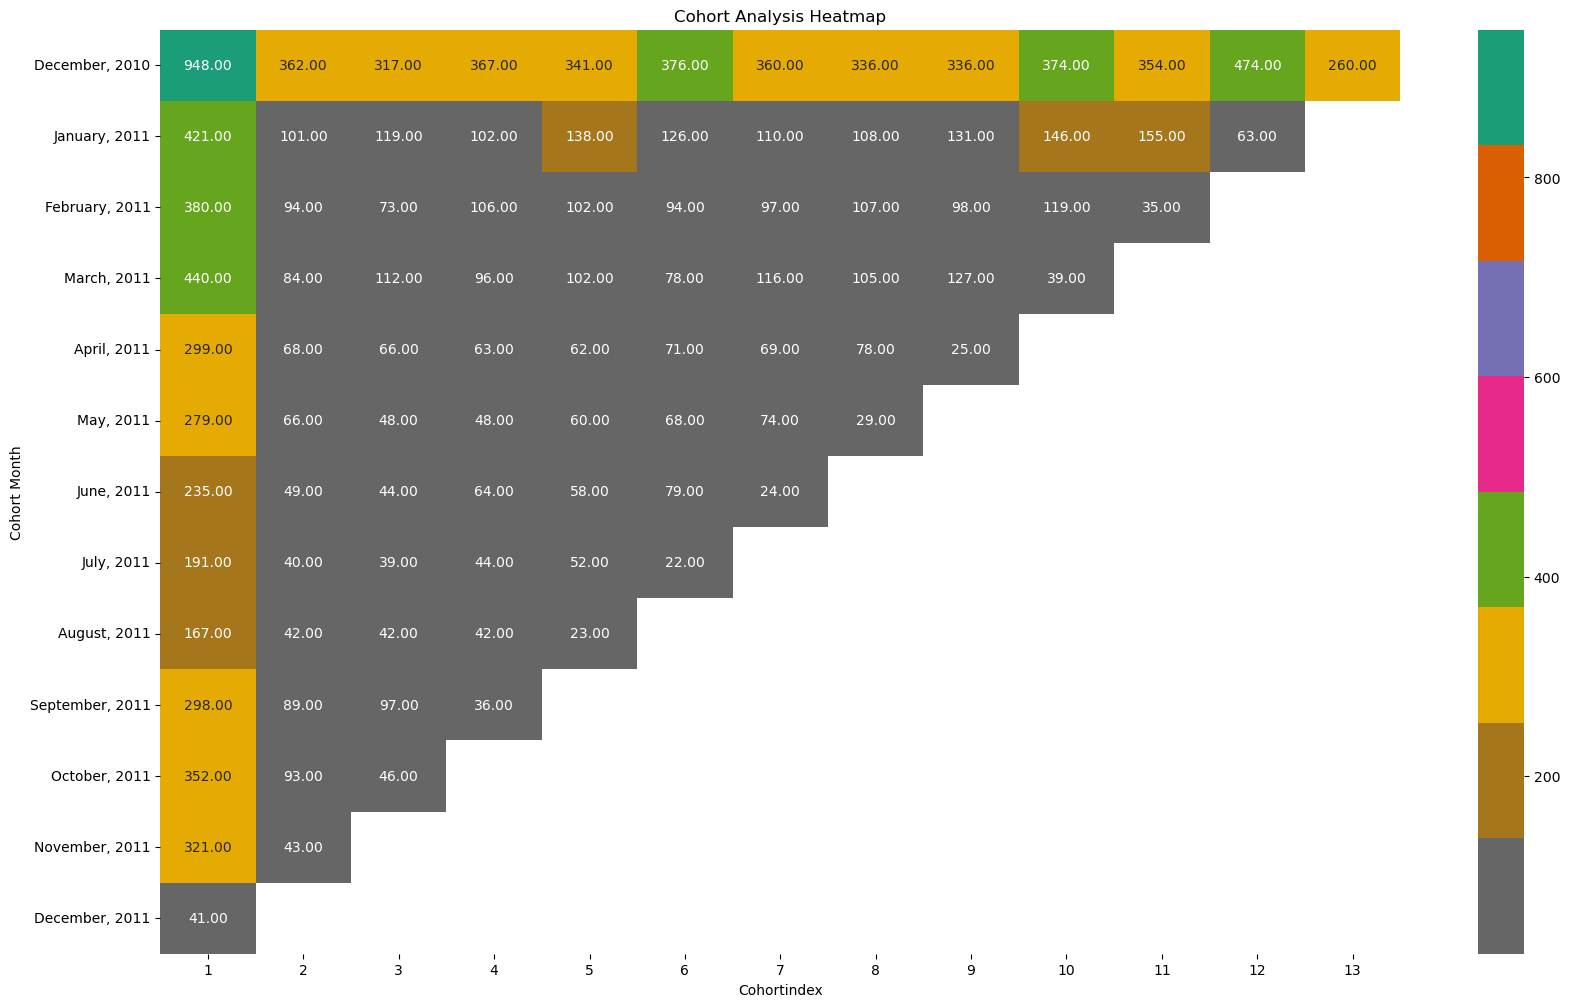

In [187]:
# visualise our result in heatmap 
plt.figure(figsize = (20, 12))
sns.heatmap(cohort_table, annot = True, cmap = 'Dark2_r', fmt = '.2f')
plt.title('Cohort Analysis Heatmap')
plt.show()

# Cohort table for percentage

In [198]:
# Cohort table for percentage 
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis =0)
new_cohort_table

Cohortindex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
"December, 2010",1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
"January, 2011",1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
"February, 2011",1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
"March, 2011",1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
"April, 2011",1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
"May, 2011",1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
"June, 2011",1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
"July, 2011",1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"August, 2011",1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# visualise our chort Analysis in heatmap in percentages 

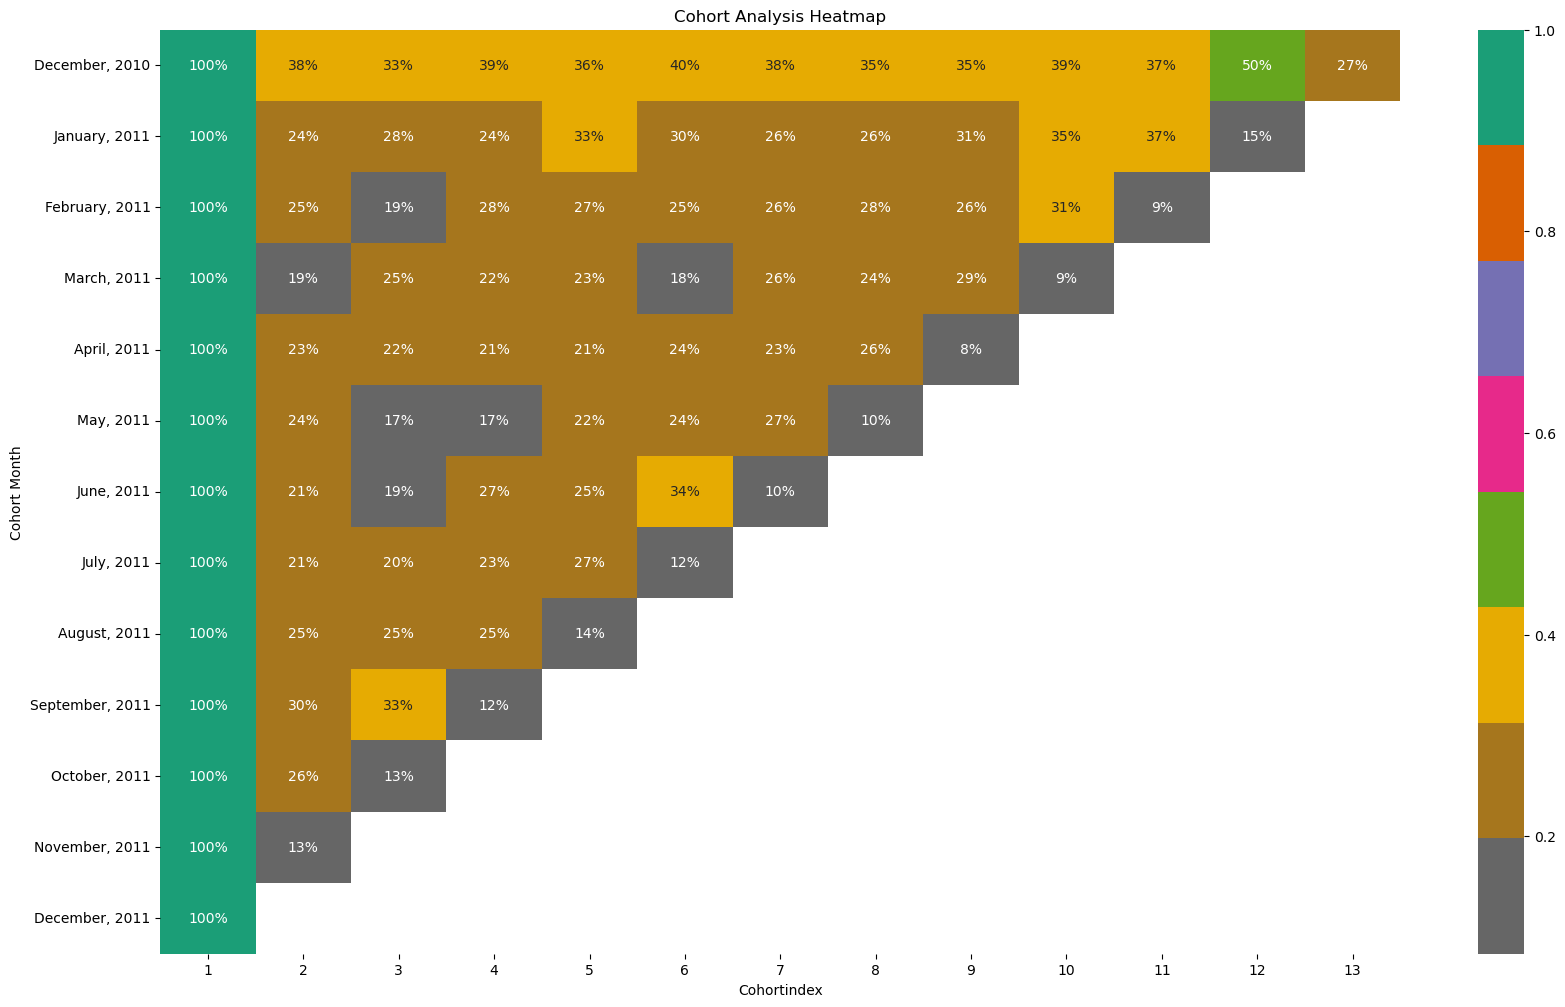

In [202]:
# visualise our result in heatmap in percentages 
plt.figure(figsize = (20, 12))
sns.heatmap(new_cohort_table, annot = True, cmap = 'Dark2_r', fmt = '.0%')
plt.title('Cohort Analysis Heatmap')
plt.show()

# Interpretation of Cohort Analysis
## Overview:
The cohort analysis table displays the percentage of customers who continue to engage with the business over time, relative to their initial number in the first month (cohort month). Each row represents a cohort based on the month of first interaction, and each column represents the percentage of those customers who returned in subsequent months.

## Key Insights:

1. Initial Engagement Drop-Off: There is a noticeable drop in customer retention after the first month for all cohorts. For instance, from the December 2010 cohort, only 38.19% of customers returned in the second month.
2. Mid-Term Retention Fluctuations: Some cohorts, such as those from December 2010 and March 2011, show fluctuations in retention rates, with some months showing an increase in customer retention. This could indicate promotional efforts or seasonal influences.
3. Long-Term Retention Decline: As expected, there is a general decline in customer retention over time, with the most recent months showing lower percentages of returning customers.
## Business Implications:

1. Customer Retention Challenges: The consistent decline in customer retention indicates challenges in maintaining long-term engagement with customers. This could impact customer lifetime value and overall revenue.
2. Possible Seasonal Influences: The fluctuations in mid-term retention suggest that certain periods may see higher engagement, potentially due to seasonality, promotions, or other factors.
3. Need for Engagement Strategies: The data highlights the importance of developing strategies to enhance customer retention, particularly after the initial purchase period.
## Probing Questions:

1. What specific factors contribute to the initial drop-off in customer engagement?
2. Are there particular months or seasonal trends that coincide with changes in retention rates?
3. What customer feedback or data do we have that could explain fluctuations in mid-term retention?
## Recommendations:

1. Enhanced Onboarding and Follow-Up: Implement strategies to improve the onboarding process and maintain engagement immediately after the first purchase, such as personalized follow-ups or incentives.
2. Seasonal Promotions and Retargeting: Analyze and leverage seasonal trends by implementing targeted marketing campaigns and promotions during periods with historically higher retention rates.
3. Customer Experience Improvement: Gather and analyze customer feedback to identify pain points and areas for improvement in the customer journey. Address these to enhance overall satisfaction and loyalty.

By focusing on these areas, the business can aim to improve customer retention, ultimately increasing customer lifetime value and driving sustainable growth.

# A snapshort of Customer Retention Insights from Cohort Analysis 


### Key Insights:

1. Initial Engagement Drop-Off: Significant drop in customer retention after the first month across all cohorts.
2. Mid-Term Fluctuations: Some months show unexpected increases in retention—likely due to promotions or seasonal factors.
3. Long-Term Decline: A general trend of decreasing customer engagement over time.
### Business Implications:

1. Retention Challenges: Immediate post-purchase engagement needs improvement.
2. Seasonal Influence: Potential opportunities to leverage seasonal trends.
### Recommendations:

1. Enhanced Onboarding: Strengthen follow-up strategies after the first purchase.
2. Targeted Promotions: Utilize seasonal insights for strategic marketing campaigns.
3. Customer Experience Optimization: Focus on improving customer satisfaction and loyalty.
- Excited to delve deeper into these trends and drive data-informed strategies! 